# 6.4 Machine Learning Part 1

## 1. Importing libraries and data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
path = r'/Users/test/Desktop/Data Analysis/World Happiness Report'

In [9]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'world_happiness_final.csv'), index_col = False)

## 2. Data cleaning

In [12]:
df.columns

Index(['Unnamed: 0', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'GDP per capita', 'Social Support', 'Life Expectancy', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual',
       'Year'],
      dtype='object')

In [14]:
df = df.drop(columns=['Unnamed: 0'])

In [16]:
df.head(20)

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social Support,Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
5,Finland,Western Europe,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015
6,Netherlands,Western Europe,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015
7,Sweden,Western Europe,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015
8,New Zealand,Australia and New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015
9,Australia,Australia and New Zealand,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015


In [18]:
# Check for missing values

df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
GDP per capita                   0
Social Support                   0
Life Expectancy                  0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

In [20]:
# Check for duplicates
dups = df.duplicated()

In [22]:
dups.shape

(782,)

## 3. Statistic Analysis

/var/folders/23/dwh_pxj57x19sw0ns77c_swh0000gn/T/ipykernel_15861/3820217407.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Happiness Score'], bins=25) # Shows extreme values


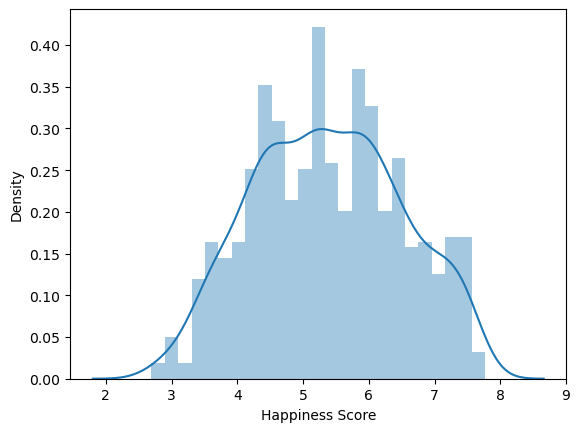

In [32]:
sns.distplot(df['Happiness Score'], bins=25) # Shows extreme values
plt.show()

In [34]:
df['Happiness Score'].mean() # Check the mean

5.379017902998669

In [36]:
df['Happiness Score'].median() # Check the median

5.322

In [38]:
df['Happiness Score'].max() # Check the max

7.769

## 4. Data prep for regression analysis 

Hypothesis: Countries with stronger social support systems have higher happiness scores.

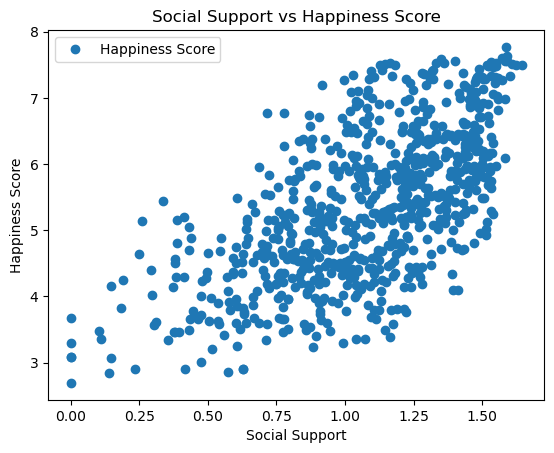

In [46]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Social Support', y='Happiness Score',style='o') 
plt.title('Social Support vs Happiness Score')  
plt.xlabel('Social Support')  
plt.ylabel('Happiness Score')  
plt.show()

In [58]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Social Support'].values.reshape(-1,1)
y = df['Happiness Score'].values.reshape(-1,1)

In [60]:
X

array([[1.34951   ],
       [1.40223   ],
       [1.36058   ],
       [1.33095   ],
       [1.32261   ],
       [1.31826   ],
       [1.28017   ],
       [1.28907   ],
       [1.31967   ],
       [1.30923   ],
       [1.22393   ],
       [1.23788   ],
       [1.29704   ],
       [0.91451   ],
       [1.24711   ],
       [1.23287   ],
       [1.21963   ],
       [1.36948   ],
       [1.28566   ],
       [1.12575   ],
       [1.28548   ],
       [1.08182   ],
       [1.25596   ],
       [1.02      ],
       [1.1985    ],
       [1.29937   ],
       [1.12447   ],
       [1.0786    ],
       [1.26038   ],
       [1.24823   ],
       [1.20643   ],
       [1.2089    ],
       [1.24018   ],
       [1.26504   ],
       [1.08393   ],
       [1.31379   ],
       [1.30203   ],
       [1.07617   ],
       [1.16594   ],
       [0.972     ],
       [1.18354   ],
       [1.02507   ],
       [1.04356   ],
       [1.34043   ],
       [1.26999   ],
       [1.25712   ],
       [0.95774   ],
       [0.999

In [62]:
y

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [64]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 5. Regression analysis

In [67]:
# Create a regression object.

regression = LinearRegression()

In [69]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [71]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

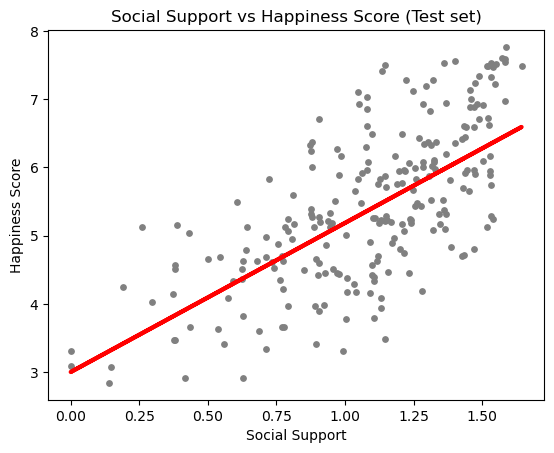

In [73]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Social Support vs Happiness Score (Test set)')
plot_test.xlabel('Social Support')
plot_test.ylabel('Happiness Score')
plot_test.show()

Insights:

The data points generally follow an upward trend. The regression line appears to fit the data reasonably well.

However, there is some scatter around the line, especially at lower and mid-range Social Support values, suggesting that other factors likely influence Happiness Score in addition to Social Support.

There are a few outliers where the Happiness Score is significantly higher or lower than what the model predicts based on Social Support alone. This indicates that the model does not account for all variations in the data.

Further analysis incorporating other variables might improve the predictive power of the model.

In [77]:
# Check the model performance statistics—MSE and R2 score
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [79]:
# Print the model summary statistics to evaluate.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.1871086]]
Mean squared error:  0.6997978715680674
R2 score:  0.4675009306538136


Insights:
1.The slope 2.1871 indicates a strong positive association between Social Support and Happiness Score.

2. Mean Squared Error (0.6998) is not extremely small, suggesting the model has some room for improvement.

3. An R2 score of 0.4675 is a moderate level of explanatory power, but it implies that other factors contribute significantly to Happiness Score and should be considered for better prediction.

In [83]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.525,5.968050
1,6.886,6.216146
2,6.344,5.813013
3,7.119,5.726474
4,3.781,5.191880
5,4.692,4.555149
6,4.390,5.415664
7,5.061,4.729284
8,6.929,5.300819
9,5.488,4.328868


### Compare how the regression fits the training set

In [86]:
y_predicted_train = regression.predict(X_train)

In [88]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [90]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.1871086]]
Mean squared error:  0.7511443382175684
R2 score:  0.39838702760767375


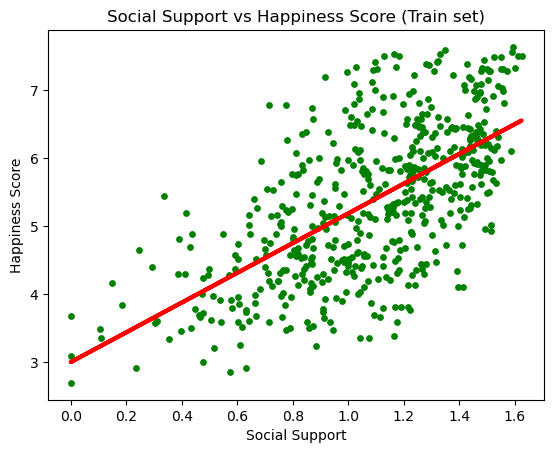

In [92]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Social Support vs Happiness Score (Train set)')
plot_test.xlabel('Social Support')
plot_test.ylabel('Happiness Score')
plot_test.show()

Insights:

Comparing actual and predicted:

y values reveals that the model performs reasonably well for the majority of cases but may deviate significantly for outliers.
The "Difference" column in the DataFrame highlights these deviations, which might indicate areas where the linear relationship fails to capture the complexity of the data.

Impact of Possible Data Bias:

1. Underrepresentation: Some countries might have incomplete or biased data, especially those with political or economic instability. This could skew predictions.

2. Simplicity of Model: A linear regression assumes a straight-line relationship, which may oversimplify complex relationships between social support and happiness.

3. Cultural Factors: Happiness is subjective and influenced by cultural values, which are not captured by the social support variable alone.

## 6. Export the updated dataframe

In [97]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'world_happiness_final.csv'), index=False)